In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [10]:
from google.colab import files
uploaded = files.upload()

Saving after_wargame.csv to after_wargame (1).csv


In [11]:
df = pd.read_csv('after_wargame.csv')
print(df.shape) # (344, 9)
df = df[['Players']]

(21, 6)


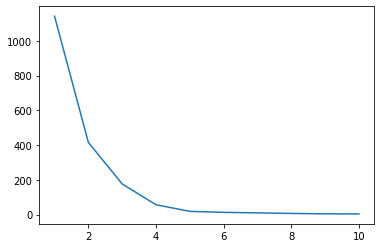

In [12]:
wcss = []

for i in range(1, 11):
    clustering = KMeans(n_clusters=i, init='k-means++', random_state=42)
    clustering.fit(df)
    wcss.append(clustering.inertia_)
    
ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sns.lineplot(x = ks, y = wcss);

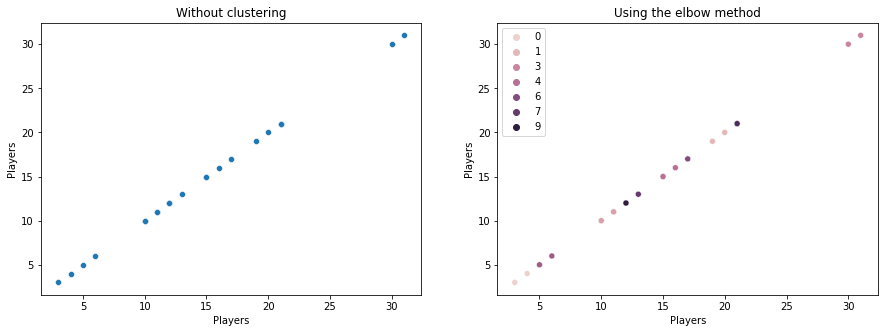

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='Players', y='Players').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='Players', y='Players', hue=clustering.labels_).set_title('Using the elbow method');

In [14]:
df.describe()

,Players
count,21.000000
mean,14.380952
std,7.552987
min,3.000000
25%,10.000000
50%,13.000000
75%,19.000000
max,31.000000


In [15]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
scaled = ss.fit_transform(df)

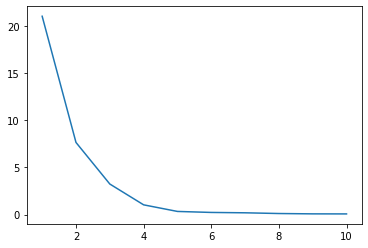

In [16]:
wcss_sc = []

for i in range(1, 11):
    clustering_sc = KMeans(n_clusters=i, init='k-means++', random_state=42)
    clustering_sc.fit(scaled)
    wcss_sc.append(clustering_sc.inertia_)
    
ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sns.lineplot(x = ks, y = wcss_sc);